## Load data

In [1]:
from dmml_project.dataset import Dataset
from dmml_project import PROJECT_ROOT, PAPER_IMAGES
import matplotlib.pyplot as plt
import seaborn as sns

dataset: Dataset = Dataset.load(f'{PROJECT_ROOT}/data/dataset.tsv')

## Data exploration

### Class distribution

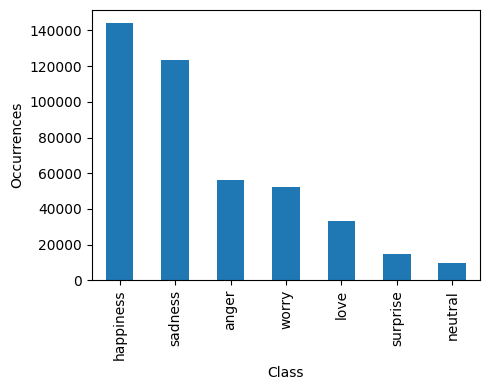

In [2]:
fig = plt.figure(figsize=(5, 4))
dataset.data['label'].value_counts().plot(kind='bar', xlabel='label', ylabel='occurrences')
plt.xlabel("Class")
plt.ylabel("Occurrences")
plt.tight_layout()
plt.savefig(f'{PAPER_IMAGES}/class_distribution.png')
plt.show()

### Length distribution
The length was capped at 400 to make the graph more readable, nearly all sequences are shorter than 400.

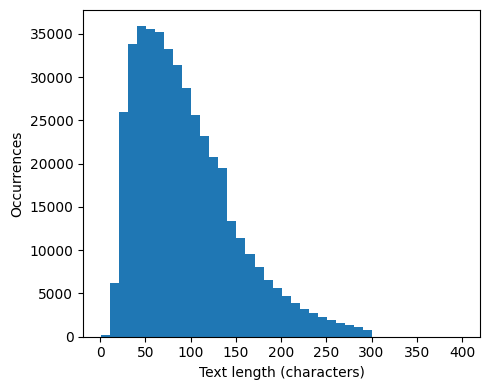

In [3]:
fig = plt.figure(figsize=(5, 4))
plt.hist([min(len(x), 400) for x in dataset.data['text']], bins=40)
plt.xlabel("Text length (characters)")
plt.ylabel("Occurrences")
plt.tight_layout()
plt.savefig(f'{PAPER_IMAGES}/length_distribution.png')
plt.show()

## Preprocessing

In [4]:
from dmml_project.preprocessor import Preprocessor

pp: Preprocessor = Preprocessor.load(f"{PROJECT_ROOT}/data/preprocessor/tfidf.pkl")

In [5]:
random_examples = dataset.data['text'].sample(5)
print("Before preprocessing:")
print(random_examples)
print("After preprocessing:")
print(pp(random_examples))

Before preprocessing:
363895    im feeling rather popular for a change as ive ...
193736    i only got the information on line but im stil...
195429    i realised that i was lying on my back on the ...
103043                 i feel not respected at work i guess
108600    i would ever get down and start feeling sorry ...
Name: text, dtype: object
After preprocessing:
  (0, 5096)	0.2803482082599867
  (0, 7771)	0.2084686556307844
  (0, 15738)	0.03947217652366216
  (0, 22111)	0.11082522795459325
  (0, 23348)	0.1600612377793932
  (0, 30883)	0.3214199632153169
  (0, 30904)	0.34312185844838267
  (0, 36092)	0.2383281363336977
  (0, 37896)	0.19815579087606405
  (0, 40860)	0.4208422538842209
  (0, 45737)	0.3061487263505442
  (0, 45815)	0.2376964080920679
  (0, 48620)	0.20439168291350512
  (0, 48721)	0.3373023339192281
  (0, 52298)	0.19619568109022978
  (1, 5596)	0.4082633789735386
  (1, 14486)	0.34423539196000363
  (1, 15738)	0.048433099456352595
  (1, 18465)	0.17109072235623257
  (1, 18734)	0.2

In [6]:
violin_plot_data = dataset.data.copy()
violin_plot_data['len'] = violin_plot_data['text'].apply(lambda x: len(x))

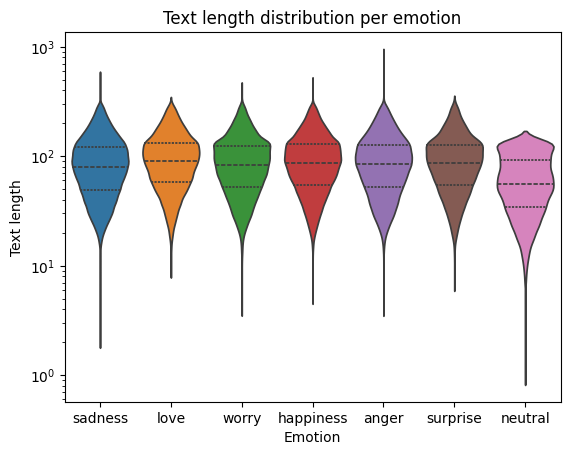

In [7]:
sns.violinplot(data=violin_plot_data, x='label', y='len', hue='label', inner='quartile', log_scale=True).set_title('Text length distribution per emotion')
plt.xlabel('Emotion')
plt.ylabel('Text length')
plt.show()